In [1]:
import tensorflow as tf

/Users/Ivan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [5]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul_2:0' shape=(5,) dtype=int32>

In [6]:
sess = tf.Session()
print (sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [7]:
with tf.Session() as sees:
    output = sees.run(res)
    print (output)

[ 6 14 24 36 50]


In [8]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

###  Neural network for traficc

In [12]:
import os
import skimage.data as imd
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory) 
           if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_name= [os.path.join(label_dir,f)
                   for f in os.listdir(label_dir)
                   if f.endswith(".ppm")]
        for f in file_name:
            images.append(imd.imread(f))
            labels.append(int(d))
    
    return images,labels

In [13]:
main_dir = "../../datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing")

In [14]:
images, labels = load_ml_data(train_data_dir)

In [17]:
len(images)

4575

In [18]:
import numpy as np
import pandas as pd

In [76]:
images = np.array(images)
labels = np.array(labels)

In [20]:
import matplotlib.pyplot as plt

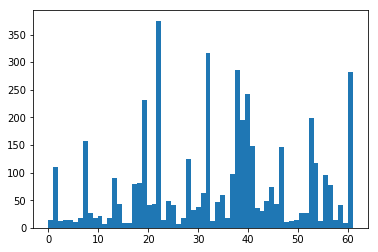

In [22]:
plt.hist(labels,len(set(labels)))
plt.show()

In [23]:
import random

In [25]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[4518, 3658, 902, 1628, 3916, 4434]

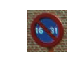

Forma:(62, 59, 3),min:2,max:237


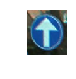

Forma:(71, 63, 3),min:2,max:255


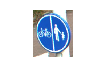

Forma:(130, 110, 3),min:0,max:255


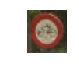

Forma:(55, 51, 3),min:14,max:198


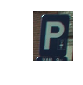

Forma:(116, 91, 3),min:2,max:255


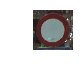

Forma:(116, 115, 3),min:13,max:255


In [31]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print ("Forma:{0},min:{1},max:{2}".format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()
                                            ))

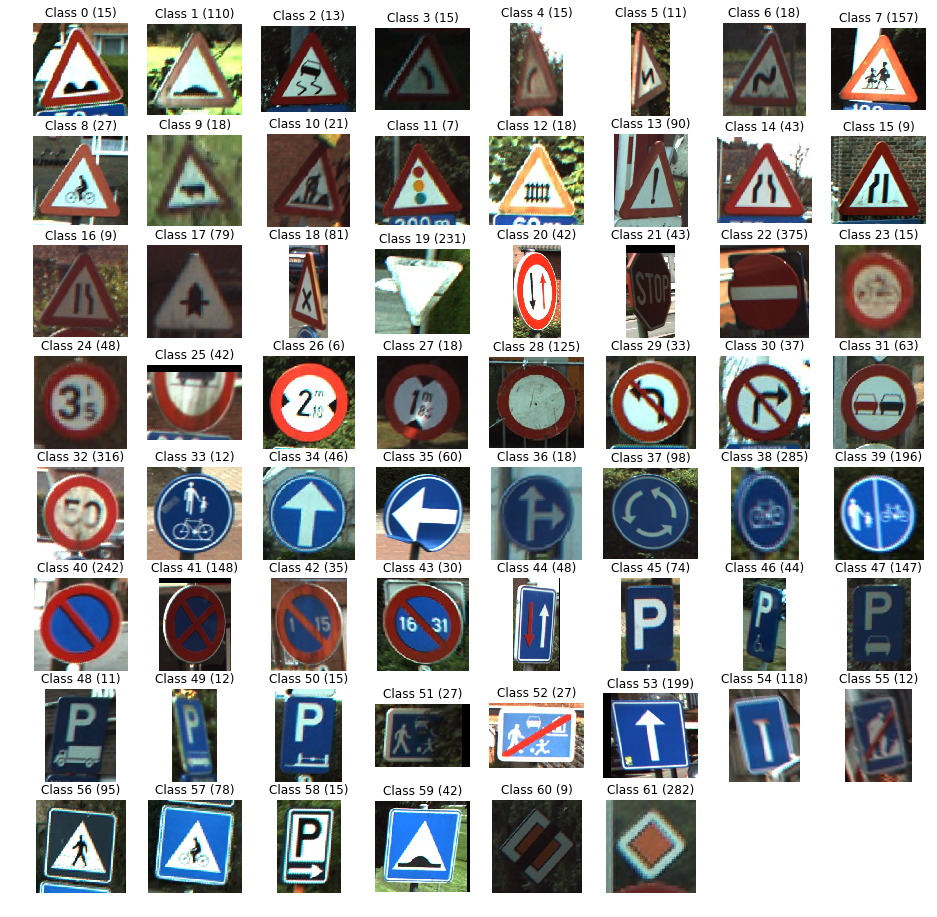

In [33]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Class {0} ({1})".format(label,list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()

### Create the model with TensorFlow

In [34]:
from skimage import transform

In [35]:
w, h = 9999,9999
for image in images:
    if image.shape[1] < w:
        w = image.shape[1]
    if image.shape[0] < h:
        h = image.shape[0]
print (w, h)

(20, 22)


In [36]:
images30 = [transform.resize(image, (30,30)) for image in images]

/Users/Ivan/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [37]:
from skimage.color import rgb2gray

In [38]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

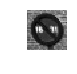

Forma:(30, 30),min:0.0993624862745,max:0.700294039216


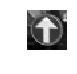

Forma:(30, 30),min:0.0788361797386,max:0.95499578268


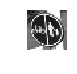

Forma:(30, 30),min:0.223342745098,max:1.0


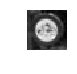

Forma:(30, 30),min:0.138751343137,max:0.709901001634


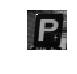

Forma:(30, 30),min:0.0950139660131,max:0.848557120915


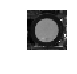

Forma:(30, 30),min:0.0989702145969,max:0.97221327451


In [77]:
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print ("Forma:{0},min:{1},max:{2}".format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()
                                            ))

In [78]:
x = tf.placeholder(dtype= tf.float32,shape=[None,30,30])
y = tf.placeholder(dtype= tf.int32, shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))

In [79]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for i in range(1000):
    _, accuracy_value = session.run([train_opt, accuracy],
                                   feed_dict = {
                                       x: images30,
                                       y: list(labels)
                                   })
    if i%100 == 0:
        print ("EPOCH" , i)
        print ("Accurancy:", accuracy_value)
        print ("Loss:", loss)

('EPOCH', 0)
('Accurancy:', 22.066229)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 100)
('Accurancy:', 31.762186)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 200)
('Accurancy:', 31.434973)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 300)
('Accurancy:', 31.354317)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 400)
('Accurancy:', 31.296831)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 500)
('Accurancy:', 31.188196)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 600)
('Accurancy:', 30.986229)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 700)
('Accurancy:', 30.8306)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 800)
('Accurancy:', 30.696394)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)
('EPOCH', 900)
('Accurancy:', 30.561968)
('Loss:', <tf.Tensor 'Mean_4:0' shape=() dtype=float32>)


### Evaluated the neural network

In [80]:
sample_idx = random.sample(range(len(images30)),16)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [81]:
sample_labels

[7, 38, 39, 38, 7, 46, 7, 39, 45, 51, 19, 43, 41, 41, 7, 40]

In [82]:
predictions = session.run([final_pred],feed_dict={x:sample_images,})[0]
predictions

array([ 7, 38, 39, 38,  7, 46,  7, 39, 45, 39, 19, 40, 41, 41,  7, 40])

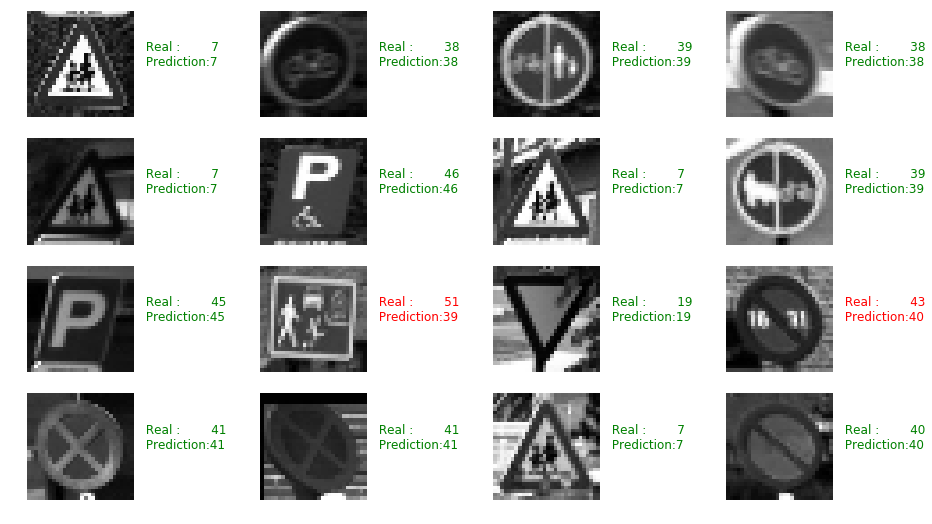

In [83]:
plt.figure(figsize=(16,9))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    pred= predictions[i]
    plt.subplot(4,4,i+1)
    plt.axis("off")
    color = "green" if truth == pred else "red"
    plt.text(32, 15," Real :        {0}\n Prediction:{1}".format(truth,pred),
             fontsize=12,color=color)
    plt.imshow(sample_images[i],cmap="gray")
plt.show()

In [84]:
test_images , test_labels = load_ml_data(test_data_dir)

In [85]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [86]:
test_images30 = rgb2gray(np.array(test_images30))

In [87]:
prediction = session.run([final_pred],feed_dict={x:test_images30})[0]

In [88]:
match_count = sum([int(y == y_) for y,y_ in zip(test_labels,prediction)])
match_count

1600

In [89]:
accuracy = float(match_count)/float(len(test_labels))*100
accuracy

63.49206349206349